In [32]:
# Importação completa das bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier



# Conector com o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
df_covid_dados = pd.read_csv('/content/drive/MyDrive/UP/Ciência de Dados/Covid/CovidCuritiba.csv', sep=';', encoding='iso-8859-1')


In [34]:
df_covid = df_covid_dados.dropna(axis=0)
df_covid

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE (anos),SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO (SIM/NÃO),DATA COLETA EXAME,DATA ÓBITO,ENCERRAMENTO
110,28/03/2020,CONFIRMADO,61,M,AHÚ,DSMZ,SIM,30/03/2020,18/04/2020,ÓBITO CONF
114,29/03/2020,CONFIRMADO,56,F,XAXIM,DSBQ,SIM,29/03/2020,06/04/2020,ÓBITO CONF
138,31/03/2020,CONFIRMADO,39,F,BOA VISTA,DSBV,SIM,31/03/2020,25/04/2020,ÓBITO CONF
139,31/03/2020,CONFIRMADO,93,M,CAJURU,DSCJ,SIM,31/03/2020,21/04/2020,ÓBITO CONF
152,01/04/2020,CONFIRMADO,94,M,CAMPINA DO SIQUEIRA,DSSF,SIM,01/04/2020,06/04/2020,ÓBITO CONF
...,...,...,...,...,...,...,...,...,...,...
520334,19/09/2022,CONFIRMADO,84,F,CIDADE INDUSTRIAL DE CURITIBA,DSCIC,SIM,09/09/2022,18/09/2022,ÓBITO CONF
520737,26/09/2022,CONFIRMADO,4,F,CIDADE INDUSTRIAL DE CURITIBA,DSCIC,SIM,13/07/2022,12/08/2022,ÓBITO CONF
520743,26/09/2022,CONFIRMADO,86,M,ATUBA,DSBV,SIM,28/08/2022,14/09/2022,ÓBITO CONF
520850,27/09/2022,CONFIRMADO,91,M,ABRANCHES,DSBV,SIM,26/09/2022,03/10/2022,ÓBITO CONF


In [35]:
df_covid.dtypes

DATA INCLUSÃO/ NOTIFICAÇÃO    object
CLASSIFICAÇÃO FINAL           object
IDADE (anos)                   int64
SEXO                          object
BAIRRO                        object
DISTRITO RESIDÊNCIA           object
INTERNADO (SIM/NÃO)           object
DATA COLETA EXAME             object
DATA ÓBITO                    object
ENCERRAMENTO                  object
dtype: object

In [36]:
df_covid.groupby(['BAIRRO']).size()

BAIRRO
ABRANCHES          55
AHÚ                40
ALTO BOQUEIRÃO    233
ALTO DA GLÓRIA     34
ALTO DA RUA XV     45
                 ... 
UMBARÁ             87
VILA IZABEL        57
VISTA ALEGRE       44
XAXIM             271
ÁGUA VERDE        198
Length: 75, dtype: int64

In [37]:
df_covid.rename(columns={'IDADE (anos)': 'IDADE', 'DATA INCLUSÃO/ NOTIFICAÇÃO': 'DATA_INCLUSAO', 'DATA COLETA EXAME': 'DATA_COLETA', 'DATA ÓBITO' : 'DATA_O', 'INTERNADO (SIM/NÃO)' : 'INTERNADO'}, inplace = True)
df_covid['SEXO'].replace({'F': 0, 'M': 1}, inplace=True)
df_covid['CLASSIFICAÇÃO FINAL'].replace({'CONFIRMADO': 1, 'NEGATIVO': 0}, inplace=True)
df_covid['INTERNADO'].replace({'SIM': 1, 'NÃO': 0}, inplace=True)
df_covid['ENCERRAMENTO'].replace({'ÓBITO CONF': 1, 'RECUPERADO': 2}, inplace=True)
df_datas_x =  df_covid.drop(['DATA_INCLUSAO', 'DATA_COLETA', 'DATA_O',  'DISTRITO RESIDÊNCIA'], axis = 1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
df_xaxim_m = df_datas_x.loc[df_datas_x.BAIRRO == 'XAXIM' ]
df_x = df_xaxim_m.loc[df_datas_x.IDADE > 35 ] 
df_x

,CLASSIFICAÇÃO FINAL,IDADE,SEXO,BAIRRO,INTERNADO,ENCERRAMENTO
1681,1,75,1,ALTO BOQUEIRÃO,1,1
2014,1,46,1,ALTO BOQUEIRÃO,0,1
3445,1,87,0,ALTO BOQUEIRÃO,1,1
3495,1,77,0,ALTO BOQUEIRÃO,1,1
3773,1,80,0,ALTO BOQUEIRÃO,1,1
...,...,...,...,...,...,...
426468,1,93,1,ALTO BOQUEIRÃO,1,1
462180,1,77,0,ALTO BOQUEIRÃO,1,1
462480,1,41,1,ALTO BOQUEIRÃO,1,1
493308,1,68,0,ALTO BOQUEIRÃO,1,1


In [39]:
boxplot = px.box(df_x, y="IDADE")
boxplot.show()

((array([-2.78669845, -2.48585217, -2.31513239, -2.19327999, -2.09728068,
         -2.01743383, -1.94869563, -1.88809418, -1.83372496, -1.78429122,
         -1.73886859, -1.69677396, -1.65748763, -1.62060466, -1.58580313,
         -1.55282269, -1.5214497 , -1.49150657, -1.46284399, -1.43533522,
         -1.40887166, -1.38335956, -1.35871736, -1.33487368, -1.31176566,
         -1.28933761, -1.26754002, -1.24632858, -1.22566355, -1.20550908,
         -1.18583274, -1.1666051 , -1.14779934, -1.12939099, -1.1113576 ,
         -1.09367856, -1.0763349 , -1.05930911, -1.04258497, -1.02614747,
         -1.00998265, -0.99407753, -0.97841998, -0.96299871, -0.94780311,
         -0.93282328, -0.91804989, -0.90347421, -0.88908799, -0.87488346,
         -0.86085331, -0.84699059, -0.83328877, -0.81974163, -0.80634329,
         -0.79308816, -0.77997093, -0.76698656, -0.75413022, -0.74139734,
         -0.72878354, -0.71628465, -0.70389666, -0.69161577, -0.67943832,
         -0.6673608 , -0.65537984, -0.

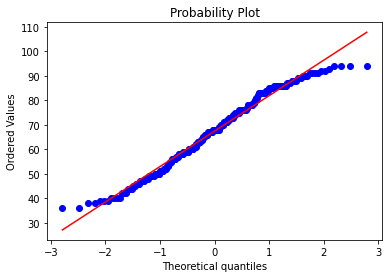

In [40]:
stats.probplot(df_x['IDADE'], dist="norm", plot=plt)

In [41]:
# pvalue
stats.shapiro(df_x.IDADE)

ShapiroResult(statistic=0.9764407873153687, pvalue=0.0002642665058374405)

In [42]:
hist =  px.histogram (df_x,  x = "IDADE", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição das idades') 
hist.show()

In [43]:
df_x_ATT = df_x.drop([ 'BAIRRO'], axis = 1)

## ESCALONAMENTO

In [44]:
escala = StandardScaler()
df_xaxim_esc = escala.fit_transform(df_x_ATT)

# Agrupamento com todos os atributos
df_xaxim_esc

array([[ 0.        , -0.7906172 , -1.11417203,  0.16633696,  0.        ],
       [ 0.        ,  1.41600309, -1.11417203,  0.16633696,  0.        ],
       [ 0.        ,  1.8297444 , -1.11417203,  0.16633696,  0.        ],
       ...,
       [ 0.        ,  0.72643425,  0.89752747,  0.16633696,  0.        ],
       [ 0.        ,  1.27808933, -1.11417203,  0.16633696,  0.        ],
       [ 0.        ,  1.27808933, -1.11417203,  0.16633696,  0.        ]])

In [45]:
df_xaxim_esc.shape

(260, 5)

In [46]:
dados = df_x_ATT.iloc[:, [2,3]].values
dados

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1,

## PCA

In [47]:
pca = PCA(n_components = 2)
df_xaxim_pca = pca.fit_transform(df_xaxim_esc)
df_xaxim_pca

array([[ 1.19241700e-01, -3.36006774e-01],
       [ 1.53349316e+00, -9.24931660e-01],
       [ 1.79866531e+00, -1.03535508e+00],
       [ 1.13573494e+00, -7.59296536e-01],
       [ 1.31251637e+00, -8.32912147e-01],
       [-1.14363191e+00,  3.82853682e-01],
       [-9.66850474e-01,  3.09238071e-01],
       [ 3.51139989e+00,  4.91763320e+00],
       [-1.45930449e-01, -2.25583358e-01],
       [-1.01104583e+00,  3.27641974e-01],
       [ 1.09153958e+00, -7.40892633e-01],
       [ 1.31251637e+00, -8.32912147e-01],
       [ 1.82228838e-01, -1.69263399e-01],
       [ 7.82172072e-01, -6.12065315e-01],
       [-9.66850474e-01,  3.09238071e-01],
       [ 7.82172072e-01, -6.12065315e-01],
       [ 4.72804565e-01, -4.83237996e-01],
       [-1.05524119e+00,  3.46045876e-01],
       [-1.67397620e+00,  6.03700514e-01],
       [ 5.61195281e-01, -5.20045801e-01],
       [-1.36460870e+00,  4.74873195e-01],
       [-1.01104583e+00,  3.27641974e-01],
       [ 7.37976714e-01, -5.93661412e-01],
       [ 1.

## DENDOGRAMA

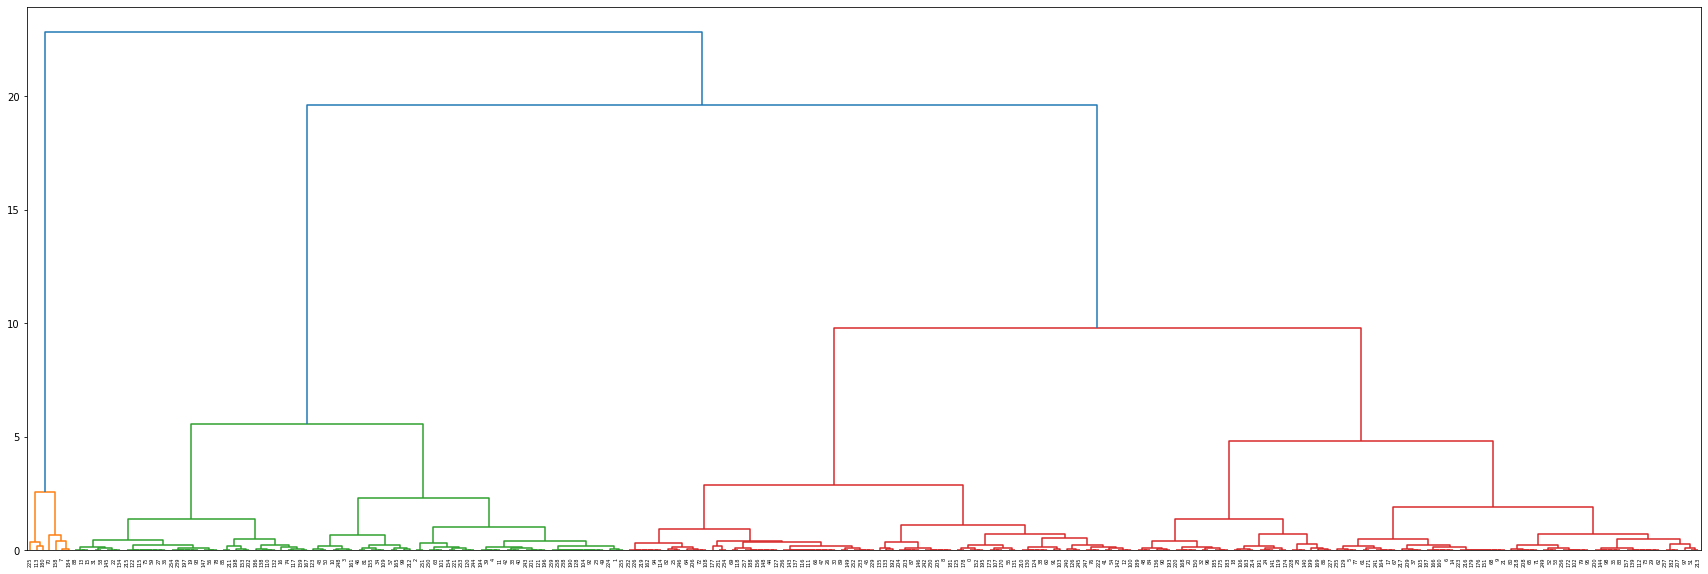

In [48]:
plt.figure(figsize=(30, 10))
dendrograma = dendrogram(linkage(df_xaxim_pca, method = 'ward')) 

In [49]:
hier = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage = 'complete')
classificacao = hier.fit_predict(df_xaxim_pca)
classificacao

array([3, 1, 1, 1, 1, 0, 0, 2, 3, 0, 1, 1, 3, 1, 0, 1, 3, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 3, 1, 0, 0, 3, 1, 0, 1, 1, 0, 1, 0, 3, 1, 1, 3, 1, 1,
       3, 3, 1, 3, 0, 1, 1, 0, 0, 0, 3, 3, 1, 1, 1, 1, 3, 0, 0, 1, 0, 0,
       3, 0, 0, 3, 2, 0, 0, 0, 3, 1, 3, 0, 1, 0, 0, 1, 3, 0, 0, 3, 0, 3,
       1, 3, 0, 3, 1, 1, 3, 0, 0, 0, 0, 1, 3, 1, 0, 3, 1, 0, 0, 3, 0, 1,
       3, 3, 0, 4, 3, 1, 3, 3, 3, 0, 1, 1, 1, 1, 3, 3, 3, 3, 1, 0, 3, 3,
       3, 3, 1, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 1, 3, 1, 3, 3, 0, 0, 3, 3,
       1, 1, 3, 0, 2, 3, 0, 1, 3, 0, 0, 1, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0,
       0, 3, 3, 0, 4, 3, 0, 0, 2, 0, 3, 0, 3, 0, 1, 0, 3, 0, 1, 3, 1, 1,
       3, 0, 0, 1, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 1, 0, 0, 1, 0, 0, 0, 3,
       0, 1, 3, 0, 1, 4, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 1, 1, 3, 0,
       3, 1, 1, 3, 0, 3, 1, 0, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1])

In [50]:
graf = px.scatter(x = df_xaxim_pca[:,0], y = df_xaxim_pca[:,1], color=classificacao)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

## *Grafico Cotovelo

In [51]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_xaxim_pca)

    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



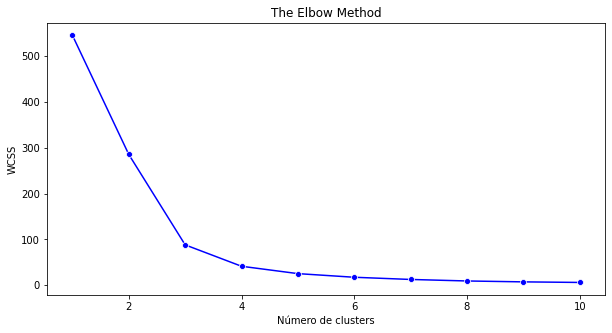

In [52]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

Alto Boqueirao

In [90]:
df_AB_m = df_datas_x.loc[df_datas_x.BAIRRO == 'ALTO BOQUEIRÃO' ]
df_AB = df_AB_m.loc[df_datas_x.IDADE > 35 ] 
df_AB

,CLASSIFICAÇÃO FINAL,IDADE,SEXO,BAIRRO,INTERNADO,ENCERRAMENTO
1681,1,75,1,ALTO BOQUEIRÃO,1,1
2014,1,46,1,ALTO BOQUEIRÃO,0,1
3445,1,87,0,ALTO BOQUEIRÃO,1,1
3495,1,77,0,ALTO BOQUEIRÃO,1,1
3773,1,80,0,ALTO BOQUEIRÃO,1,1
...,...,...,...,...,...,...
426468,1,93,1,ALTO BOQUEIRÃO,1,1
462180,1,77,0,ALTO BOQUEIRÃO,1,1
462480,1,41,1,ALTO BOQUEIRÃO,1,1
493308,1,68,0,ALTO BOQUEIRÃO,1,1


In [99]:
df_AB_f = df_AB.drop([ 'BAIRRO', 'INTERNADO'], axis = 1)

In [100]:
pca = PCA(n_components=2)

In [128]:
pca_AB2 = pca.fit_transform(df_AB_f)

In [129]:
pca_AB2.shape

(222, 2)

In [130]:
pca_AB2

array([[  9.05649723,  -0.51927615],
       [-19.94325694,  -0.39986981],
       [ 21.06051297,   0.43130586],
       [ 11.06059774,   0.47248046],
       [ 14.06057231,   0.46012808],
       [ 15.06056383,   0.45601062],
       [ 17.05642942,  -0.55221582],
       [-24.9390971 ,   0.62070901],
       [-17.93915644,   0.59188679],
       [-14.93918187,   0.57953441],
       [  1.05656504,  -0.48633647],
       [  4.06065707,   0.50130268],
       [ 13.05646332,  -0.53574599],
       [-17.93915644,   0.59188679],
       [ 11.05648028,  -0.52751107],
       [ 17.06054688,   0.4477757 ],
       [  4.06065707,   0.50130268],
       [-14.94329933,  -0.42045711],
       [ 10.06060621,   0.47659792],
       [-18.94326542,  -0.40398727],
       [  3.05654809,  -0.49457139],
       [  1.05656504,  -0.48633647],
       [  9.05649723,  -0.51927615],
       [ 15.05644637,  -0.54398091],
       [ 24.06048754,   0.41895348],
       [ 22.06050449,   0.4271884 ],
       [  1.0606825 ,   0.51365505],
 

In [104]:
pca.explained_variance_ratio_

array([0.99869555, 0.00130445])

In [105]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [131]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_AB2,
    labels=labels,
    dimensions=range(2), # numero de componentes do pca (PCA(n_components=2))
    color = df_AB_f['IDADE']
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
# Não deu muito certo ^
#                     |

K Means com PCA

In [108]:
pca.explained_variance_ratio_

array([0.99869555, 0.00130445])

In [109]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [110]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_AB_f)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



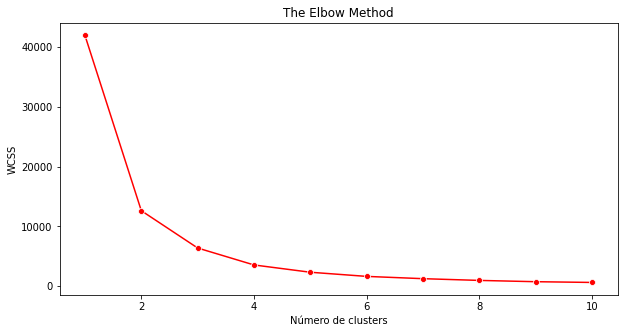

In [111]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

In [132]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [133]:
kmeans_fit = kmeans.fit(pca_AB2)

In [134]:
centroides = kmeans_fit.cluster_centers_
centroides

array([[ 18.69267085,  -0.04675358],
       [ -6.9968635 ,   0.04682772],
       [-21.01330395,  -0.06212774],
       [  5.81164576,   0.02350076]])

In [135]:
classificacao = kmeans_fit.labels_
classificacao

array([3, 2, 0, 3, 0, 0, 0, 2, 2, 2, 3, 3, 0, 2, 3, 0, 3, 2, 3, 2, 3, 3,
       3, 0, 0, 0, 3, 2, 2, 1, 3, 3, 3, 3, 0, 1, 1, 3, 3, 0, 0, 3, 3, 2,
       3, 3, 2, 3, 3, 0, 3, 1, 3, 0, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 3, 1,
       3, 2, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 0, 0, 0, 0, 3, 2, 1, 3, 2,
       0, 3, 1, 0, 2, 3, 1, 3, 3, 2, 0, 1, 3, 0, 0, 1, 3, 1, 1, 3, 1, 0,
       3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 2, 3, 3, 2, 2, 2, 0, 3, 3, 0, 3,
       2, 2, 0, 3, 0, 2, 2, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 3, 2, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 1, 3, 1, 2, 1, 0,
       1, 3, 2, 1, 2, 1, 1, 0, 1, 3, 2, 3, 1, 1, 3, 3, 0, 0, 3, 3, 3, 1,
       0, 0, 3, 3, 0, 0, 3, 2, 3, 1, 3, 2, 1, 2, 3, 3, 0, 1, 3, 0, 3, 2,
       3, 0], dtype=int32)

In [137]:
classificacao[2]


0

In [138]:
graf1 = px.scatter(x = pca_AB2[:,0], y = pca_AB2[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()